In [109]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('D:/DATA SCIENCE/ASSIGNMENT/QUESTION/LOGISTIC REGRESSION/bank-full.csv',sep=";")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.head(11)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [43]:
data['y']=label_encoder.fit_transform(data['y'])

In [44]:
y=data.iloc[:,16]

In [45]:
y


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [9]:
label_encoder=preprocessing.LabelEncoder()

In [10]:
data['job']=label_encoder.fit_transform(data['job'])

In [11]:
data['marital']=label_encoder.fit_transform(data['marital'])

In [12]:
data['default']=label_encoder.fit_transform(data['default'])

In [13]:
data['poutcome']=label_encoder.fit_transform(data['poutcome'])

In [62]:
data1=data.drop(columns=['housing'])
data1=data1.drop(columns=['y'])

In [63]:
x1=data1.iloc[:,0:16]

In [64]:
x=pd.get_dummies(data1,columns=["education",'contact','month','loan'])
x.describe()

,age,job,marital,default,balance,day,duration,campaign,pdays,previous,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,0.018027,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,2.559974
std,10.618762,3.272657,0.608230,0.133049,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.989059
min,18.000000,0.000000,0.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,0.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,3.000000
50%,39.000000,4.000000,1.000000,0.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.000000
75%,48.000000,7.000000,2.000000,0.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,3.000000
max,95.000000,11.000000,2.000000,1.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,3.000000


In [77]:
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.80,random_state=13)
x_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 9043 entries, 37425 to 39054
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  9043 non-null   int64
 1   job                  9043 non-null   int32
 2   marital              9043 non-null   int32
 3   default              9043 non-null   int32
 4   balance              9043 non-null   int64
 5   day                  9043 non-null   int64
 6   duration             9043 non-null   int64
 7   campaign             9043 non-null   int64
 8   pdays                9043 non-null   int64
 9   previous             9043 non-null   int64
 10  poutcome             9043 non-null   int32
 11  education_primary    9043 non-null   bool 
 12  education_secondary  9043 non-null   bool 
 13  education_tertiary   9043 non-null   bool 
 14  education_unknown    9043 non-null   bool 
 15  contact_cellular     9043 non-null   bool 
 16  contact_telephone    904

In [78]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [79]:
model.coef_

array([[-3.00009966e-02,  1.96983915e-05, -1.07993089e-01,
        -6.99908242e-03,  2.58239575e-05, -2.52016124e-02,
         2.83564703e-03, -2.38726773e-01, -7.48173593e-05,
         2.54756657e-02, -1.78009502e-01, -2.70113015e-02,
        -6.56286878e-02,  2.13792775e-02,  1.72466497e-03,
         4.11748695e-02,  4.77518718e-03, -1.15486104e-01,
         1.20300589e-02,  1.10731021e-02,  5.05296441e-03,
        -2.05261253e-03, -4.80533640e-03, -2.21112187e-02,
        -1.71403763e-02,  2.34575083e-02, -1.07118811e-01,
        -9.94171450e-03,  2.27478336e-02,  1.92725554e-02,
        -2.14109126e-02, -4.81251343e-02]])

In [80]:
y_pred=model.predict(x)

In [84]:
ytrain=pd.DataFrame({'actual':y_train,'predict':model.predict(x_train)})
ytrain.value_counts()

actual  predict
0       0          7880
1       0           927
        1           130
0       1           106
Name: count, dtype: int64

In [82]:
ytest=pd.DataFrame({'actual':y_test,"predict":model.predict(x_test)})
ytest

,actual,predict
5489,0,0
32386,0,0
7374,0,0
1215,0,0
36497,0,0
...,...,...
153,0,0
22260,0,0
33634,0,0
32842,0,0


In [85]:
ytest.value_counts()

actual  predict
0       0          31558
1       0           3661
        1            571
0       1            378
Name: count, dtype: int64

In [285]:
data.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [102]:
pred=model.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31936
           1       0.60      0.13      0.22      4232

    accuracy                           0.89     36168
   macro avg       0.75      0.56      0.58     36168
weighted avg       0.86      0.89      0.86     36168



In [107]:
d=confusion_matrix(y_test,pred)

In [108]:
d

array([[31558,   378],
       [ 3661,   571]], dtype=int64)

Text(0.5, 1.0, 'confusion Matrix')

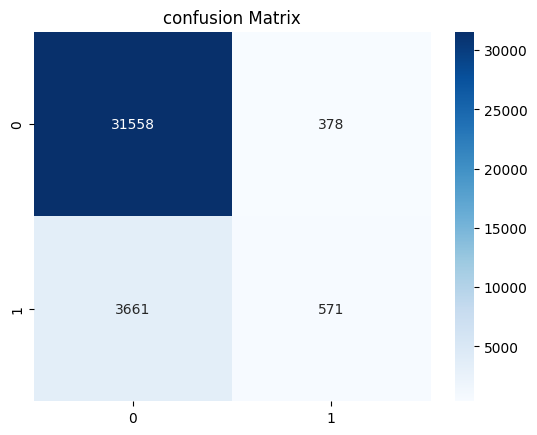

In [116]:
sns.heatmap(d,annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix")

In [118]:
f_im=pd.Series(model.coef_[0],index=x.columns)

Text(0.5, 1.0, 'feature importance')

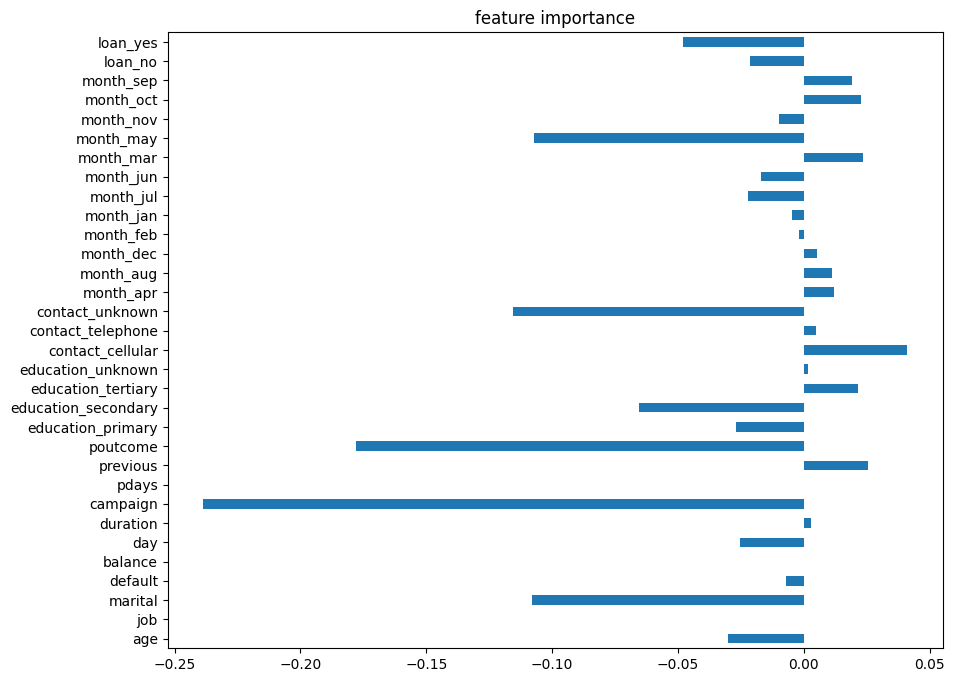

In [122]:
plt.figure(figsize=(10,8))
f_im.plot(kind='barh')
plt.title("feature importance")